
## Objective

This note book is dedicated for students who are interested in Artificial intelligence field, specially in TREE_SEARCH Algorithms topic. TREE_SEARCH algorithms are one of the most important subjects in AI that that can be applied to solve large number of problems. TREE_SEARCH algorithms can be divided into two parts, the first one is Uninformed search algorithms which do not have additional infromation about the world, whereas the second part is Informed search algorithms which in the contrary have some additional information that helps the search to be more efficient. ِAlso, there is a type that falls under Informed search algorithms called Local search algorithms. Local search algorithms have some properties that distinguish it from the rest of the Informed search algorithms, one of these properties is that it solves problems with large number of states in the state space, so it does not always promise to find a solution to the problem. 

This notebook will focus on two of the Informed search algorithms. The first one is A* Alogrithm, which is one of an informed search algorithms that guarantees to find an optimal sulotion, whereas the other algorithm is called Simulated annealing (SA) which is one of local search algorithms that does not necessarly find the optimal solution. 


## An example problem that can be solved by the two algorithms:

### 1- Problem description:
In a farmhouse, a rabbit tries to reach the carrots hole by going through underground paths. The rabbit wants to reach the carrots in shortest path possible.
 
 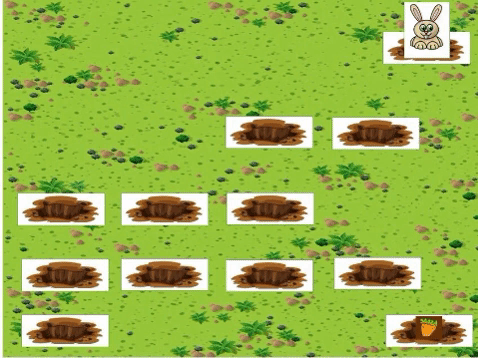
 
 ###  - State space:
 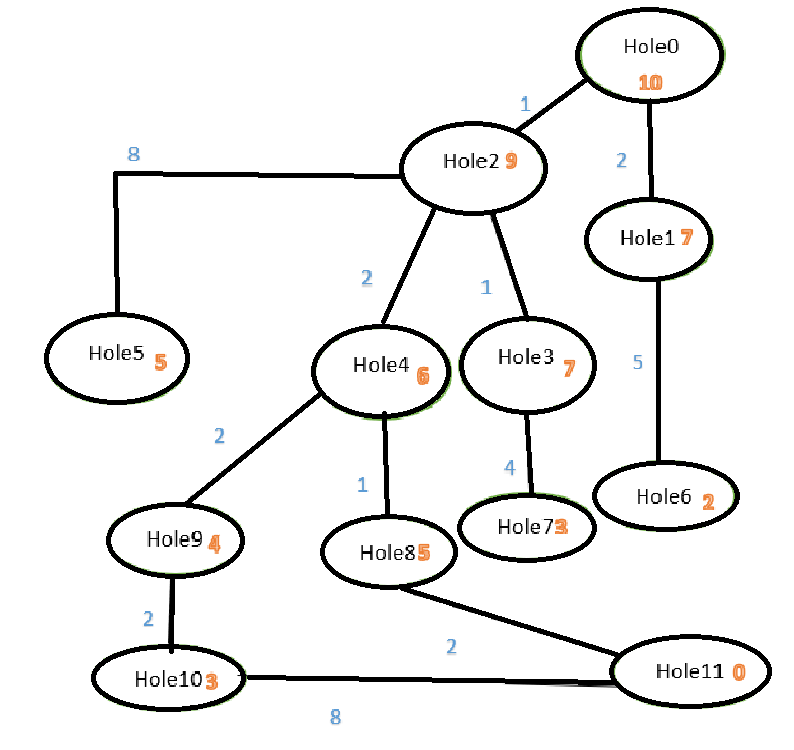

### 2- Problem formulation:

- State space: a bunch of holes connected by paths in which the rabbit go from, to reach the carrots.
- Where the start node is the current position of the rabbit.
- Goal State: Rabbit reach the carrot plant.
- Heuristics function: Straight line distance
- Action: moving from one hole to the other
- Path cost function: the length of a path in meters.
- Solution of the problem: a path from the initial state to the goal state.



## A* algorithm

A* type of searching algorithm , that aims to find the shortest(lowest cost) path.

A* is the fastest search algorithm. That is, for any given heuristic, no algorithm can expand fewer nodes than A*.it is a complete algorithm as long as branching factor is always ﬁnite and at least every operator adds cost . 

A* is an optimal algorithm . 
- Time Complexity: O( b^m), where b is a braching factor and m is remain step to goal. 
- Space Complexity: O( b^m), where b is a braching factor and m is remain step to goal.

# A* algorithm components :

- h (heuristic function) which represent a straight line distance , h equlas to 0 at goal state.
- g which represent the cost from start state to current state , g is initially 0 at start state.
- f (evaluation function) which equals the sum of h and g , f is initially equals g at goal state and equals h at start state.
- all states that can reach to single mutual state are called "children" ,and the mutual state is called "parent" .

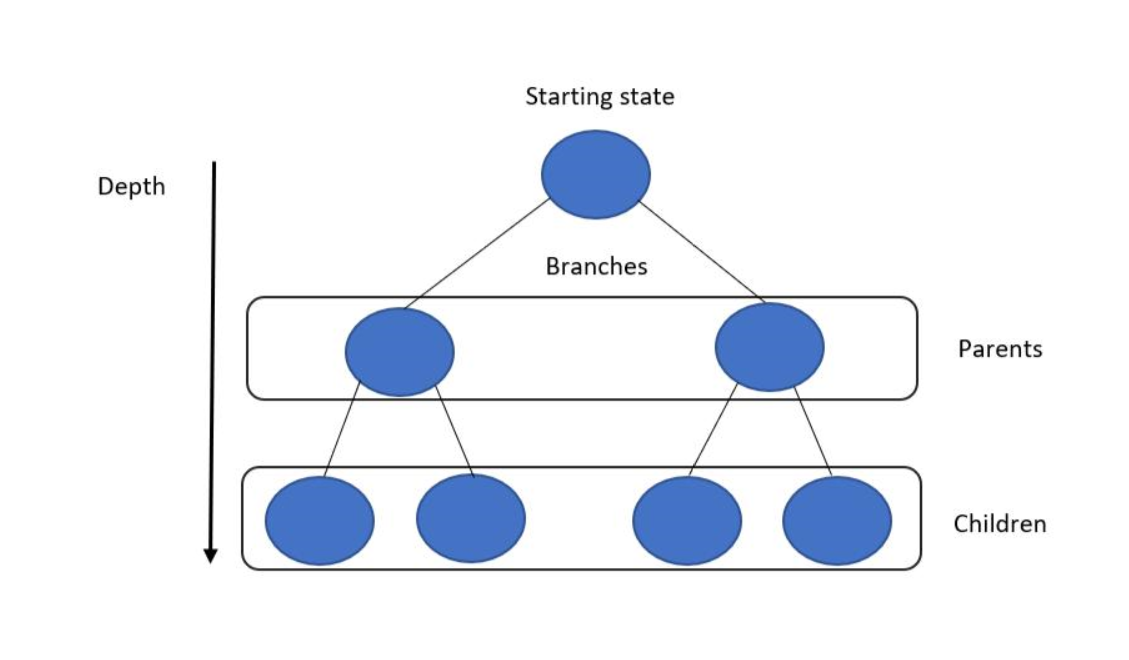

## Solving the problem using A* algorithm

- we can solve the previous problem by using :
 - g which represent the diatence from the start hole to the current hole.
 - h (heuristic function) which represent the straight line distence from the current hole to the carrot (goal hole)
 - f (evaluation function) which represent the sum of g and h.

## how the algorithm works : 

1- start the searching from the start state.

2- using two lists:
 - the first one for adding the visited state  .
 - the other one for adding expanded state .
 
3- we add the start state in the visited state list.
 
4- while the visited list have states in it , all steps from step 5 are repeated.
 
5- the state will be chosen based on the lowest value of f.
 
6- the state that has been chosen in step 5 will be moved from visited list to expanded list .
 
7- each time the state will be tested if it is a goal state or not , if it is not a goal state the neighbors for that state will be added in visited list as long as it is not in expanded list , in each time will compute the values of h,g,f for each state.
 
8- if it is a goal state then the algorithm will return the path.

## for more information about heuristic function

####  heuristic function has two properties      :
Admissible heuristics : heuristic is said admissible if it is never overestimates the real cost to reach the goal state , A* is optimal if the type of search TREE-SEARCH and it uses admissible heuristics  .

consistent heuristics:  heuristic is said consistent if for every state i , every successor state j of i , f(i) is less than or equal to f(j) . A* is optimal if the type of search is GRAPH-SEARCH and it uses consistent heuristics .


# how to implement the algorithm

First, to represent the problem as graph search problem we create two classes "Vertex" and "Graph". We used "Vertex" class to represent the holes in our problem. A hole has the following attributes:

- name.
- hueristic function (h).
- path cost function (g) which represent the cost from the starting node to the current node.
- Evaluation Function (f) representing the total hurescic function and path cost functions .
- an array of neighbors (neighbors[]) which represent all nodes connected to the current node.
- parent of the current node (parent).

we create "IsInNeighborsList" method that checks if a node is in neighbors list or not. This method shows its benefit in class "Graph" specifically in "find_neighbors" method.


In [1]:
#first create class vertex, a vertex has a name (e.g: hole0) and a huerstic function
class Vertex:

	def __init__(self, name, h, g=0, neighbors=[], parent=None, f=0 ):
		self.name = name
		self.h=h
		self.g=g        
		self.neighbors=neighbors.copy()        
		self.parent=parent
		self.f=f
        
	def IsInNeighborsList(self, node):
		for x in self.neighbors:
			if node==x.name:
				return True
			return False

Secondly, to connect all holes created with "Vertex" class together, we used "Graph" class which has the following attributes:

- "vertices" is a dictionary of vertices that keeps all vertices objects as the value and a vertex name as the key 
- "edges" is a two dimension (2D) array that keeps values of edges. an edge represent the paths that connect the holes (aka: vertices) together
- "edge_indices" is a dictionary that stores the indices for each vertex, we will use this dictionary as an indexing mechanism to reach elements in the 2D array
- start and goal nodes which initially they equal to None

The "Graph" class has the following methods:

- "add_vertex" which adds a vertex to "vertices" dictionary
- "add_edge" which adds an edge to "edges" array 
- "find_neighbors" that explore state space to find the neighbors of a node and then add it to "neighbors" list.

In [2]:

class Graph:
	vertices = {}
	edges = []  
	edge_indices = {} 
	start=None
	goal=None
    
  
	def add_vertex(self, vertex):
		if isinstance(vertex, Vertex) and vertex.name not in self.vertices: 
			self.vertices[vertex.name] = vertex 
			for row in self.edges:
				row.append(0)    
			self.edges.append([0] * (len(self.edges)+1))
			self.edge_indices[vertex.name] = len(self.edge_indices) 
			return True
		else:
			return False


	def add_edge(self, u, v, weight=1):
		if u in self.vertices and v in self.vertices:
			self.edges[self.edge_indices[u]][self.edge_indices[v]] = weight
			self.edges[self.edge_indices[v]][self.edge_indices[u]] = weight
			return True
		else:
			return False

        
	def print_graph(self):
		for v, i in sorted(self.edge_indices.items()):
			print(v + ' ', end='')
			for j in range(len(self.edges)):
				print(self.edges[i][j], end='')
			print(' ')

            
	def get_key(self,val): 
		for key, value in self.edge_indices.items(): 
			if val == value: 
				return key

	def find_neighbors(self,node_name):
		i=0
		while i<len(self.edges):
			if self.edges[self.edge_indices[node_name]][i]>0:
				child_name=self.get_key(i)
				if not self.vertices[node_name].IsInNeighborsList(child_name):             
					self.vertices[node_name].neighbors.append(self.vertices[child_name])
			i=i+1

In the following code, we create an instance of "Graph" class and we create instances of "Vertex" class to represent holes and we used "add_vertex" method to add them to the graph. Also, we used method "add_edge" to connect these vertices together. Finally we used "find_neoghbors" method to explore all nodes connected to each vertex. 

In [3]:
graph = Graph()


h0 = Vertex("hole0",10) #h0 is the starting node
graph.add_vertex(h0)
h1=Vertex("hole1",7)
graph.add_vertex(h1)
h2=Vertex("hole2",9)
graph.add_vertex(h2)
h3=Vertex("hole3",7)
graph.add_vertex(h3)
h4=Vertex("hole4",6)
graph.add_vertex(h4)
h5=Vertex("hole5",5)
graph.add_vertex(h5)
h6=Vertex("hole6",2)
graph.add_vertex(h6)
h7=Vertex("hole7",3)
graph.add_vertex(h7)
h8=Vertex("hole8",5)
graph.add_vertex(h8)
h9=Vertex("hole9",4)
graph.add_vertex(h9)
h10=Vertex("hole10",3)
graph.add_vertex(h10)
h11=Vertex("hole11",0)
graph.add_vertex(h11) #h11 is the goal node


graph.add_edge("hole0","hole2",1)
graph.add_edge("hole0","hole1",2)
graph.add_edge("hole1","hole6",5)
graph.add_edge("hole2","hole3",1)
graph.add_edge("hole2","hole4",2)
graph.add_edge("hole2","hole5",8)
graph.add_edge("hole3","hole7",4)
graph.add_edge("hole4","hole8",1)
graph.add_edge("hole4","hole9",2)
graph.add_edge("hole8","hole11",2)
graph.add_edge("hole9","hole10",2)
graph.add_edge("hole10","hole11",8)

                                                             
                                                             
graph.find_neighbors(h0.name)
graph.find_neighbors(h1.name)
graph.find_neighbors(h2.name)
graph.find_neighbors(h3.name)
graph.find_neighbors(h4.name)
graph.find_neighbors(h5.name)
graph.find_neighbors(h6.name)
graph.find_neighbors(h7.name)
graph.find_neighbors(h8.name)
graph.find_neighbors(h9.name)
graph.find_neighbors(h10.name)
graph.find_neighbors(h11.name)

graph.start=h0
graph.goal=h11


### A* algorithm attributes:

- "closedList" list used to add and discover visited state.
- "openList" list used to add the state that has been discovered .
- "path" list used to add state that achieves the solution.

### how does A*  function work:

- we define A* function so that it takes graph as a parameter  

- f and G are calculated for the starting state and then add it  in the "open List" list. After each addition in the "open List" list, states are arranged in ascending order based on the F value.

- the function will search "openlist" as long as there are states need to be explored.
- The hole with the lowest F value is selected as the current state until it is discovered.
- The current state is tested whether it is the goal state, and if so the  "path" list is retrieved. 


- If the current state is not equal to the goal state, it will be added into the "closedList" list after verifying that it is not on the "closedList" ,if the current state is in "closedList" the function will return to choose a new current state. 

- generate next state using current's "neighbors" list, then assign the next state's parent to current  .

- compute g and f function of the next state,then add the neighbor state to "openList" list .

Important point:
- If the next state in the "closedList" list it will be  ignored and return to choose another neighbor.  

## usefulness of each function:

##### 1- IsInClosedList:

checks whether the state is in the "closedList" list or not. 
###### 2- SortFirst:

In this function, "openList" list will be arranged.

In [4]:
           
closedList=[]
openList=[]
path=[]           
counter=0

def Astar(graph): 
	start=graph.start
	goal=graph.goal
	start.f=start.h 
	start.g=0        
	openList.append((start.f, start))
	openList.sort(key = sortFirst)      
	while len(openList)>0 :
		global counter
		counter=counter+1        
		current=openList.pop(0)[1]
		if current.name==goal.name:
			closedList.append(current)  
			pathNode=current 
			while pathNode is not None:
				path.append(pathNode.name)
				pathNode=pathNode.parent             
			return path
		if not IsInClosedList(current):          
			closedList.append(current)        
			i=0              
			while len(current.neighbors)>i: 
				if not IsInClosedList(current.neighbors[i]):# هنا يتم إختبار ما إذا كانت الجار الحالي أب للحفرة الحالية أم ابن، فإذا كان أب لا يتم عمل ما بداخل نطاق جملة "if"                
					current.neighbors[i].parent=current
					current.neighbors[i].g=graph.edges[graph.edge_indices[current.name]][graph.edge_indices[current.neighbors[i].name]] #array[0][1]
					current.neighbors[i].g=current.neighbors[i].g+current.g                                                             
					current.neighbors[i].f=current.neighbors[i].g+current.neighbors[i].h
				if IsInClosedList(current.neighbors[i]):
					i=i+1
					continue
				openList.append((current.neighbors[i].f,current.neighbors[i]))
				openList.sort(key = sortFirst)
				i=i+1
	if len(openList)<=0: 
		return False 

            
     
            
def IsInClosedList(node):
	for x in closedList:
		if node.name==x.name:
			return True



    
def sortFirst(val): 
	return val[0]           
            
       

you can run the next cell to see the result of A* algorithm

In [6]:
print(Astar(graph))
graph.print_graph()

False
hole0 021000000000 
hole1 200000500000 
hole10 000000000208 
hole11 000000002080 
hole2 100128000000 
hole3 001000040000 
hole4 002000001200 
hole5 008000000000 
hole6 050000000000 
hole7 000400000000 
hole8 000010000002 
hole9 000020000020 


### To compute space and time complexity of A* algorithm :

Time Complexity: O( b^m), where b is a braching factor and m is remain step to goal. 

Space Complexity: O( b^m), where b is a braching factor and m is remain step to goal.

number of branches in one level = maximum number of branches in each node.


branch factor = number of branches in all levels/ number of levels-1.

branch factor =(2+3+2+1+1+0)/6-1
=1.8

m =5

space complexity =time complexity =1.8 ^(5) =18.89

##### another way to find space and time complexity
 - space complexity = number of state in "openlist" list
 - time complexity = number of state in "closelist" list
 
### you can run the next cell to see time and space complexity  using the seconed way

In [7]:
timecomplexty=len(closedList)
print("time complexity: ")
print(timecomplexty)

print("space complexity:")
print(counter)

time complexity: 
12
space complexity:
13


## Try to change the state space:
you can run the next cell to add a new edge to the graph:

In [8]:
path.clear()
closedList.clear()
openList.clear()

First_hole=input("please enter the first hole you want to add an edge to :  ")
Second_hole=input("please enter the seconed hole you want to add an edge to : ")
cost=int(input("please enter the edge's cost: "))

graph.add_edge(First_hole,Second_hole,cost)

graph.find_neighbors(First_hole)
graph.find_neighbors(Second_hole)

print(Astar(graph))

please enter the first hole you want to add an edge to :  hole4
please enter the seconed hole you want to add an edge to : hole11
please enter the edge's cost: 1
['hole11', 'hole4', 'hole2', 'hole0']


you can run the next cell to add a new hole:

In [23]:
path.clear()
closedList.clear()
openList.clear()

new_vertex=input("please enter a new hole: ")
new_h=int(input("please the heuristic value for the new hole :"))
graph.add_vertex(Vertex(new_vertex,new_h))

print("please enter the new hole's neighbors and the edges between them , when you finish please enter -1: ")
x=0

while x!= -1:
    new_neighbor=input("please enter a neighbor :  ")
    new_edge=int(input("please enter the edge's cost between them : "))
    graph.add_edge(new_vertex,new_neighbor,new_edge)
    graph.find_neighbors(new_vertex)
    graph.find_neighbors(new_neighbor)
    x=int(input("are you done?  ")


print(Astar(graph))

please enter a new hole: hole12
please the heuristic value for the new hole :1
please enter the new hole's neighbors and the edges between them , when you finish please enter -1: 
please enter a neighbor :  hole0
please enter the edge's cost between them : 1
are you done?  1
please enter a neighbor :  hole11
please enter the edge's cost between them : 1
are you done?  -1
['hole11', 'hole12', 'hole0']


## Incremental vs complete problem configurations:

### 1- Incremental problem configuration:
involves operators that augment the state, starting with an empty state, displays the state when adding each action to reach goal state.

### 2- Complete problem configuration:
path cost is not of interest, because only the final state counts. no nees to display the state when adding each action.



## Simulated Annealing

### Introduction to Simulated annealing:

Simulated annealing (SA) is one of Local search algorithms, that solves optimization problems which is characterized by large number of states in the state space. "SA" focuses on finding the goal satet rather than finding the path to the goal state and there for it tries to preserve memory space. Since "SA" dealing with large optimization problems, it does not always guarantees to find a solution.
From the difference between incremental and complete configuration problems, we find that "SA" is better dealing with complete configuratio problems because the path is not important in "SA".
"SA" is inspired by the physical annealing process of solids. The solids annealing process starts with high temperature that allows solids to melt and to shape them, then the temperature decreases slowly enough until it reaches a point where the solid takes a final form that does not allow to change it anymore. 
Unlike "Hill climbing" algorithm, "SA" can escape local maxima/minima providing that it has a good initial state and a good cooling schedule.

### Methodology:

To understand how "SA" works, let's start with an initial state i, which has heuristic value of hi, and let's assume the next state is state j that has heuristic value of hj. If hj is better than hi then the algorithm moves to the next state j. If not, the algorithm moves to next state j according to the probability shown below:

                                        probability= exp((hj-hi)/T)
                      
where T denotes to the temperature. The higher the temperatur, the greater the posibility to choose a bad move. 
"SA" keeps doing these steps until it reaches the goal state or until temperature reaches to zero. 



### Simulated annealing pseudo-code:

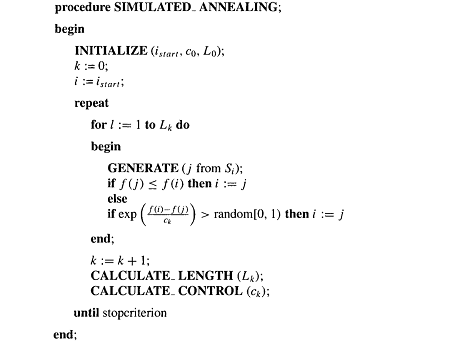

### Cooling Schedules:

Cooling schedule means the way the temperature decreases it value. Temperature starts with a large value, one way to compute it is by computing the maximal difference in cost between any two neighboring solutins. Decreasing temperature value should be slowly enough so that "SA" algorithm can find a global solution. A decrement function is given by:

                                            T(k+1)=Tk/log(k+1)        k=0,1,…
where T(k+1) denotes to the next value of temperature and k is called Boltzmann constant. 



### Simulated annealing components:

- heuristic function (h) that represent the estimated cost of Stright Line Distance (SLD).
- path cost function (g) which represent the cost of paths from the starting node to the current node.
- Temperature variable (T), one of the most important components of (SA).
- (∆E) which represent the difference between the values of heuristics of two different states.
- probalbilty value , which determine where to choose a a bad next state or not.


### applying Simulated annealing on the problem:

We will use the same problem described in the beginning of this notebook, but we will change the objective from finding the shortest path to find a path to the goal state. 




#### interpreting Simulated annealing components to match the problem describe above:

- we will use the same heuristic function shown above, where each hole has a heuristic value that represent (SLD)
- path cost function (g) will represent the path from the starting hole to the current hole.




#### how "SimulatedAnnealing" method works:
- First, we imported necessary libraries that will help us in "SA". We used "math" to help compute logarithmic and exponential functions and "random" to generate and choose random elements.
- "closedList" is an array that keeps expanded nodes.
- "path" is an array that keeps nodes that leads to the goal state.
- The method takes a graph and returns a path of the solution -if exists- or return "we got stuck in local minima" if no solution was found.
- The method assigns start node to "current" as it is the current node to be explored.
- we initialized the temperature "T" to very large value and Boltzmann constant "k" to 1
- the method will iterate the following steps until the value of "T" reaches to zero or in case a path was found:
 - we first check if "current" is the goal or not. if it is the goal we will return the path
 - if " current" is not the goal we check if it is in "closedList" using "IsInClosedList" function and if so, we will not expand "current" and we will update the temperature.
 - if "current" is not in "closedList", we will add it to "closedList", because we are going to explore it now
 - if current has no neighbors to be explored, then retrun to its parent because the parent may has some nodes that were not explored
 - choose a random neighbor of "current" as the next node to be explored, using choice() method that is defined in the imported class "random"
 - if the chosen neighbor is in the "closedList" we will remove it from "neighbors" list and then rechoose another neighbor of current.
 - compute ∆E which is equal to the difference between the heuristics of "current" and its neighbor
 - if ∆E is negative (which means that current's neighbor has smaller heuristics than current) then assign "current" to its neighbor -this is a good move-
 - if ∆E is positive then we are going to choose a bad move according to a rondom probability
 - the probability is equal to exp(-∆E/T). "exp" is exponential function that is defined in the imported calss "math".
 - to generate a rondom value between [0,1) we used random() method from the imported class "random". we assign the generated value to "r" 
 - if the probability is greater than "r", we will choose the bad move as next state to be explored
 - now we will update the value of "T" by calling "update_temperature" function, which is represent the cooling mechanism
 - the cooling mechansim compute new temperature using "log" function defined in the imported class "math". then  the function increment Boltzmann constant "k" by 1
- if the iteration ended with no solution print "we got stuck in local minima"

#### Usefulness of each function used in SA:

##### 1- update_temperature:
this method updates the value of temperature, given older value of T and the value of k

##### 2- IsInClosedList: 
this method checks where a node is in "closedList" or not. and return boolean value

In [74]:
import random
import math
from math import *


closedList=[]
path=[]         
         
    
def update_temperature(T,k):
	T1=T/log(k+1)
	return T1


def SimulatedAnnealing(graph):
	start=graph.start
	goal=graph.goal    
	current=start
	T=10000**30  
	k=1
	while T>0:
		if current.name==goal.name: #we find th goal!! now we just need to finf thhe path
			pathNode=current 
			print ("we find the goal")
			while pathNode is not None: # this while is for path list
				path.append(pathNode.name)
				pathNode=pathNode.parent
			return path
		if not IsInClosedList(current): # if node is not in closed list, then do the following         
			closedList.append(current)
			while len(current.neighbors)>0: # while neighbors list is not empty
				next_node=random.choice(current.neighbors) #choose random neighboor of current
				if not IsInClosedList(next_node):
					next_node.parent=current
					deltaE=next_node.h-current.h
					if deltaE<0:
						current=next_node                      
					else:
						probability = math.exp(-deltaE / T)
						r=random.random() #random flaoting number between 0-1
						if probability>r:
							current=next_node                          
					T=update_temperature(T,k)
					k=k+1
					break                    
				if IsInClosedList(next_node):
					current.neighbors.remove(next_node)
			if len(current.neighbors)==0: #current has no children, but its parent may have some children to explore
				current.parent.neighbors.remove(current)
				current=current.parent                
		if IsInClosedList(current): 
			T=update_temperature(T,k)
			k=k+1
	return 'we got stuck in local minima'
        
        
        
def IsInClosedList(node): # this method returns true if a node is in closed list
	for x in closedList:
		if node.name==x.name:
			return True
            



print(SimulatedAnnealing(graph))


we find the goal
['hole11', 'hole8', 'hole4', 'hole2', 'hole0']


## Time and space complexity of Simulated annealing:

we can compute time and space complexity when we run (SA) code by counting the number of expanded nodes in the "closedList"

In [ ]:
print("Time and space complexity:")
print (len(closedList))

###### Important note:
The result of complexity may change of different runs due to the random factor in (SA) algorithm

## Try to change the state space:
you can run the next cell to add a new edge to the graph:

In [58]:
path.clear()
closedList.clear()
openList.clear()

First_hole=input("please enter the first hole you want to add an edge to :  ")
Second_hole=input("please enter the seconed hole you want to add an edge to : ")
cost=int(input("please enter the edge's cost: "))

graph.add_edge(First_hole,Second_hole,cost)

graph.find_neighbors(First_hole)
graph.find_neighbors(Second_hole)

print(SimulatedAnnealing(graph))

please enter the first hole you want to add an edge to :  hole0
please enter the seconed hole you want to add an edge to : hole11
please enter the edge's cost: 1
we find the goal
['hole11', 'hole0']


you can run the next cell to add a new hole:

In [23]:
path.clear()
closedList.clear()
openList.clear()

new_vertex=input("please enter a new hole: ")
new_h=int(input("please the heuristic value for the new hole :"))
graph.add_vertex(Vertex(new_vertex,new_h))

print("please enter the new hole's neighbors and the edges between them , when you finish please enter -1: ")
x=0

while x!= -1:
    new_neighbor=input("please enter a neighbor :  ")
    new_edge=int(input("please enter the edge's cost between them : "))
    graph.add_edge(new_vertex,new_neighbor,new_edge)
    graph.find_neighbors(new_vertex)
    graph.find_neighbors(new_neighbor)
    x=int(input("are you done?  "))





print(Astar(graph))

please enter a new hole: hole12
please the heuristic value for the new hole :1
please enter the new hole's neighbors and the edges between them , when you finish please enter -1: 
please enter a neighbor :  hole0
please enter the edge's cost between them : 1
are you done?  1
please enter a neighbor :  hole11
please enter the edge's cost between them : 1
are you done?  -1
['hole11', 'hole12', 'hole0']


## References:
[1] graph_adjacency-matrix.py.(16 April 2016).https://github.com/joeyajames/Python/blob/master/graph_adjacency-matrix.py

[2] Aarts E., Korst J., Michiels W. (2005) Simulated Annealing. In: Burke E.K., Kendall G. (eds) Search Methodologies. Springer, Boston, MA

##### Students' names and their ID: 
1- Amal alotaibi (438017383)

2- Nisreen Alsayegh (438018275)

3- Norah Alkhraan (438015540)

##### Supervisor : 
dr. Areeb Alowisheq

##### Date of submission:  
24-3-2020